#### High-level "Notebook API"

In [1]:
import sys 
import os 
sys.path.insert(0, '..')


# from biosimulator_processes.api.instance import 

In [2]:
from biosimulator_processes.io import read_report_outputs
from biosimulator_processes.helpers import plot_utc_outputs, plot_ode_output_data

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [3]:
from biosimulator_processes.processes.amici_process import UtcAmici
from biosimulator_processes.processes.copasi_process import UtcCopasi
from biosimulator_processes.processes.tellurium_process import UtcTellurium

In [4]:
omex_dir = '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'
sbml_fp = os.path.join(omex_dir, 'BIOMD0000000012_url.xml')
sedml_fp = os.path.join(omex_dir, 'simulation.sedml')
reports_path = os.path.join(omex_dir, 'reports.h5')
selected_species = 'cI mRNA'

In [5]:
utc_tellurium = UtcTellurium(config={'model': {'model_source': omex_dir + '.omex'}})
tellurium_results = utc_tellurium.update()

In [6]:
utc_copasi = UtcCopasi(config={'model': {'model_source': omex_dir + '.omex'}})
copasi_results = utc_copasi.update()

In [7]:
copasi_results['floating_species'][selected_species][:3], copasi_results['floating_species'][selected_species][-1]

(array([32.52364564, 32.2999656 , 31.77048065]), 4.915315086815449)

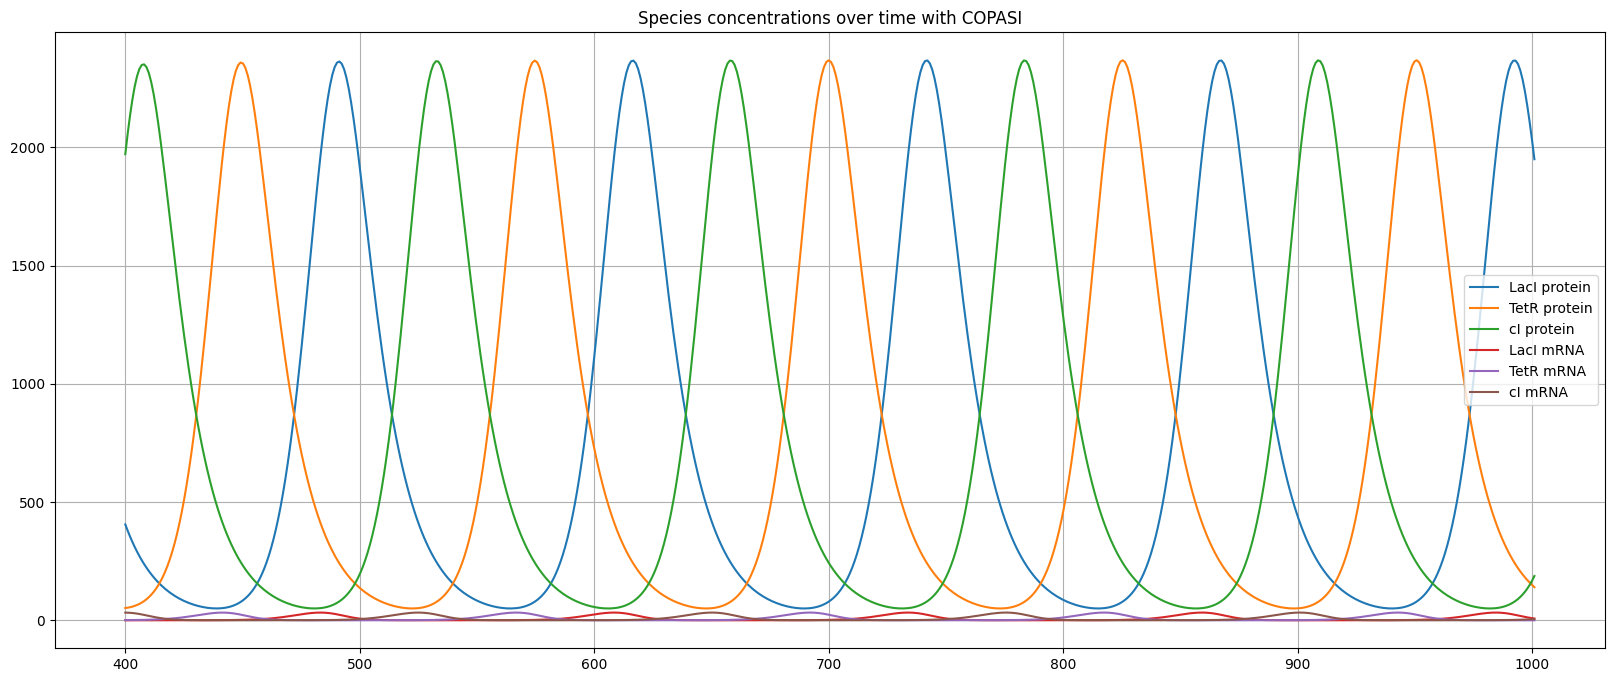

In [8]:
utc_copasi.plot_results()

In [9]:
utc_amici = UtcAmici(config={'model': {'model_source': omex_dir + '.omex'}})
amici_results = utc_amici.update()

2024-06-04 17:46:47.543 - amici.sbml_import - INFO - Finished importing SBML                         (3.87E-02s)
2024-06-04 17:46:47.591 - amici.sbml_import - INFO - Finished processing SBML observables            (4.45E-02s)
2024-06-04 17:46:47.594 - amici.sbml_import - INFO - Finished processing SBML event observables      (6.67E-07s)
2024-06-04 17:46:47.618 - amici.de_model - INFO - Finished computing xdot                            (3.70E-03s)
2024-06-04 17:46:47.625 - amici.de_model - INFO - Finished computing x0                              (2.84E-03s)
2024-06-04 17:46:47.643 - amici.de_model - INFO - Finished computing w                               (1.56E-02s)
2024-06-04 17:46:48.352 - amici.de_export - INFO - Finished generating cpp code                      (7.03E-01s)
2024-06-04 17:46:57.297 - amici.de_export - INFO - Finished compiling cpp code                       (8.94E+00s)


In [17]:
tellurium_results['floating_species'][selected_species][:600][-1], tellurium_results['floating_species'][selected_species].shape

(3.866501291206603, (601,))

In [16]:
amici_results['floating_species'][selected_species][:600][-1], amici_results['floating_species'][selected_species].shape

(3.866629952326904, (601,))

In [22]:
copasi_results['floating_species'][selected_species].shape

(600,)

In [24]:
from biosimulator_processes.api.compare import generate_comparison
import numpy as np 
import seaborn as sns

outputs = [
    amici_results['floating_species'][selected_species][:600], 
    copasi_results['floating_species'][selected_species],
    tellurium_results['floating_species'][selected_species][:600],
]
comparison = generate_comparison(
    outputs=outputs,
    simulators=['amici', 'copasi', 'tellurium'],
    method='mse'
)

Text(0.5, 1.0, 'cI mRNA')

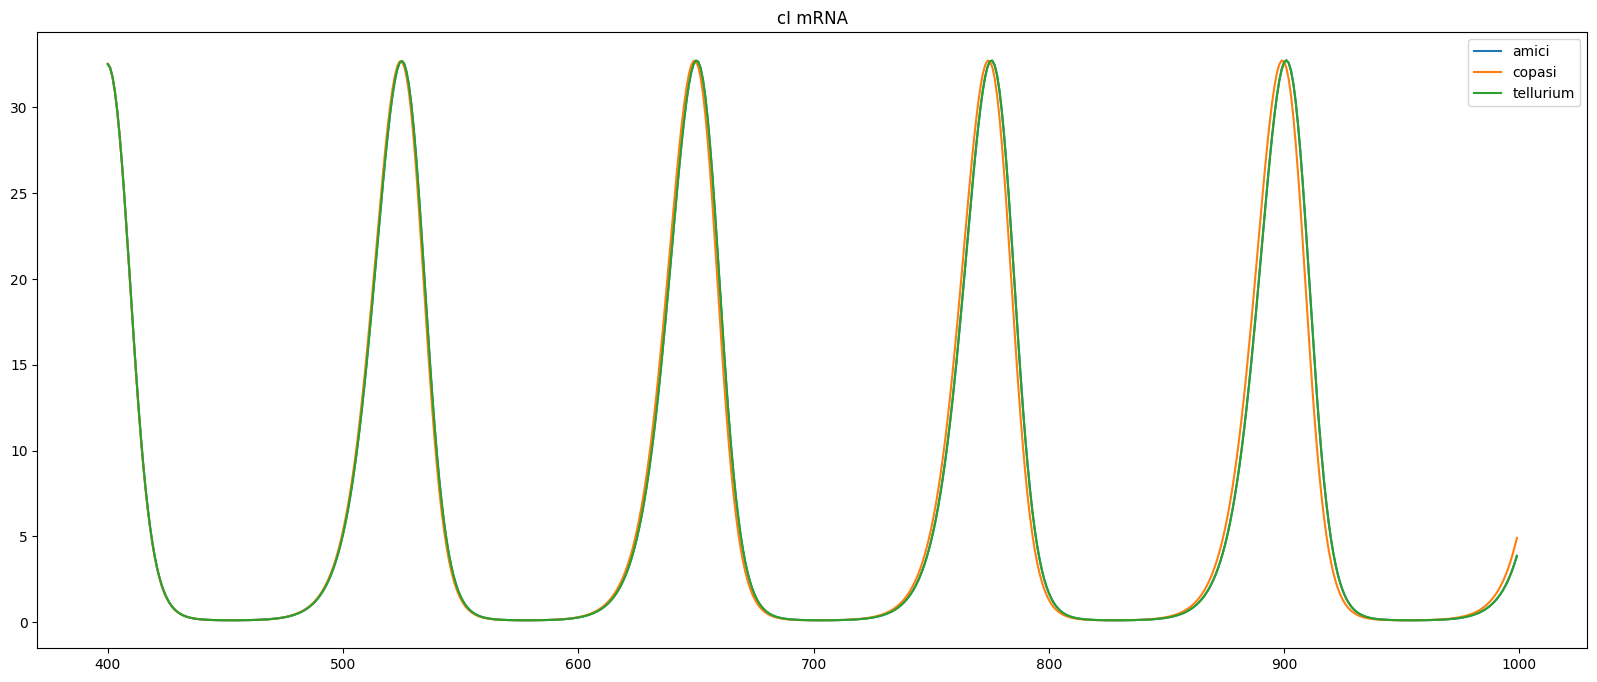

In [28]:
d = dict(zip(
    ['amici', 'copasi', 'tellurium'],
    outputs
))

import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 8))
for sim, output in d.items():
    sns.lineplot(x=amici_results['time'][:600], y=output, label=sim)
plt.title(selected_species)

In [31]:
comparison.data

{'amici': {'amici': 0.0,
  'copasi': 0.7549451761493683,
  'tellurium': 1.555328576292277e-07},
 'copasi': {'amici': 0.7549451761493683,
  'copasi': 0.0,
  'tellurium': 0.7554635238249408},
 'tellurium': {'amici': 1.555328576292277e-07,
  'copasi': 0.7554635238249408,
  'tellurium': 0.0}}